In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv("./datasets/insurance.csv")

In [31]:
data.shape

(1338, 7)

In [32]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [33]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [34]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Check if there are unexpected values for categorical or ordinal columns

In [35]:
categColumns = ['sex', 'children', 'smoker', 'region']
categColumns_uniqueValues = data[categColumns].apply(pd.Series.unique).sort_values
print(categColumns_uniqueValues)

<bound method Series.sort_values of sex                                       [female, male]
children                              [0, 1, 3, 2, 5, 4]
smoker                                         [yes, no]
region      [southwest, southeast, northwest, northeast]
dtype: object>


In [36]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


Feature Engineering

Age

In [37]:
min = data['age'].min()
max = data['age'].max()

print("Max and Min age: {} and {}".format(max, min))

Max and Min age: 64 and 18


In [38]:
#data = pd.read_csv("./datasets/insurance.csv")

bins = [18, 36, 55, 12000]
labels = ['youth', 'middleAge', 'elder']

data['age_cat'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

data

,age,sex,bmi,children,smoker,region,charges,age_cat
0,19,female,27.900,0,yes,southwest,16884.92400,youth
1,18,male,33.770,1,no,southeast,1725.55230,youth
2,28,male,33.000,3,no,southeast,4449.46200,youth
3,33,male,22.705,0,no,northwest,21984.47061,youth
4,32,male,28.880,0,no,northwest,3866.85520,youth
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,middleAge
1334,18,female,31.920,0,no,northeast,2205.98080,youth
1335,18,female,36.850,0,no,southeast,1629.83350,youth
1336,21,female,25.800,0,no,southwest,2007.94500,youth


BMI Categories

In [40]:
bins = [0, 18.5, 25, 30, 12000]
labels = ['underweight', 'normal_weight', 'overweight', 'obese']

data['weight_cat'] = pd.cut(data['bmi'], bins=bins, labels=labels, right=False)

data['weight_cat'].value_counts()

weight_cat
obese            707
overweight       386
normal_weight    225
underweight       20
Name: count, dtype: int64

QUESTION 1

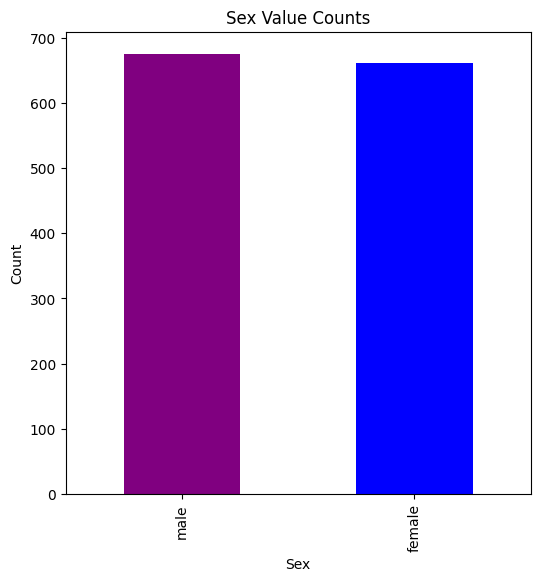

In [47]:
sexCount = data['sex'].value_counts()

fig, ax = plt.subplots(1,1, figsize=(6, 6))

sexCount.plot(kind='bar', ax=ax, color=['purple', 'blue'])
ax.set_title('Sex Value Counts')
ax.set_ylabel('Count')
ax.set_xlabel('Sex')

plt.show()

QUESTION 2

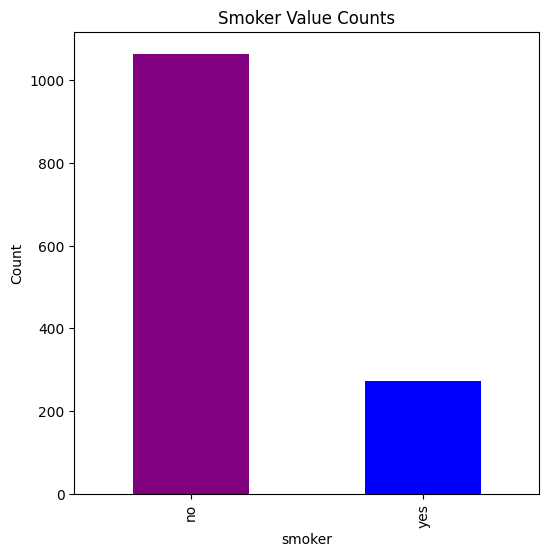

In [48]:
sexCount = data['smoker'].value_counts()

fig, ax = plt.subplots(1,1, figsize=(6, 6))

sexCount.plot(kind='bar', ax=ax, color=['purple', 'blue'])
ax.set_title('Smoker Value Counts')
ax.set_ylabel('Count')
ax.set_xlabel('smoker')

plt.show()

QUESTION 3 (I DIDN't REALIZE WE HAD TO USE CATPLOT)

In [57]:
smokerYes = data[data['smoker'] == 'yes']
revenue_by_date_customer = smokerYes.groupby(['sex', 'age_cat'])['smoker'].count()
revenue_by_date_customer

sex     age_cat  
female  youth        50
        middleAge    47
        elder        18
male    youth        71
        middleAge    64
        elder        24
Name: smoker, dtype: int64

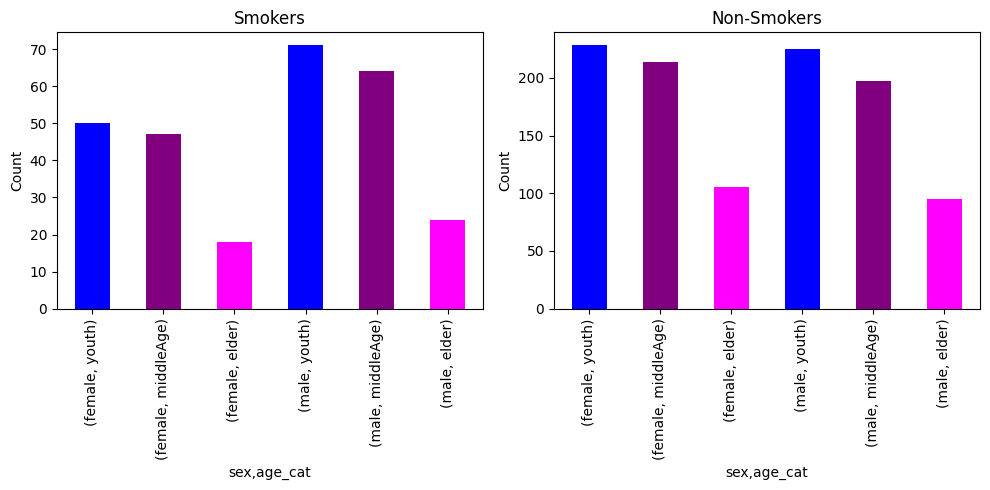

In [62]:
smokerYes = data[data['smoker'] == 'yes']
smokerNo = data[data['smoker'] == 'no']

smokerYesGroup = smokerYes.groupby(['sex', 'age_cat'])['smoker'].count()
smokerNoGroup = smokerNo.groupby(['sex', 'age_cat'])['smoker'].count()

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Smokers bar chart
smokerYesGroup.plot(kind='bar', ax=axes[0], color=['blue', 'purple', 'magenta'])
axes[0].set_title('Smokers')
axes[0].set_ylabel('Count')

# Non-smokers bar chart
smokerNoGroup.plot(kind='bar', ax=axes[1], color=['blue', 'purple', 'magenta'])
axes[1].set_title('Non-Smokers')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


QUESTION 5

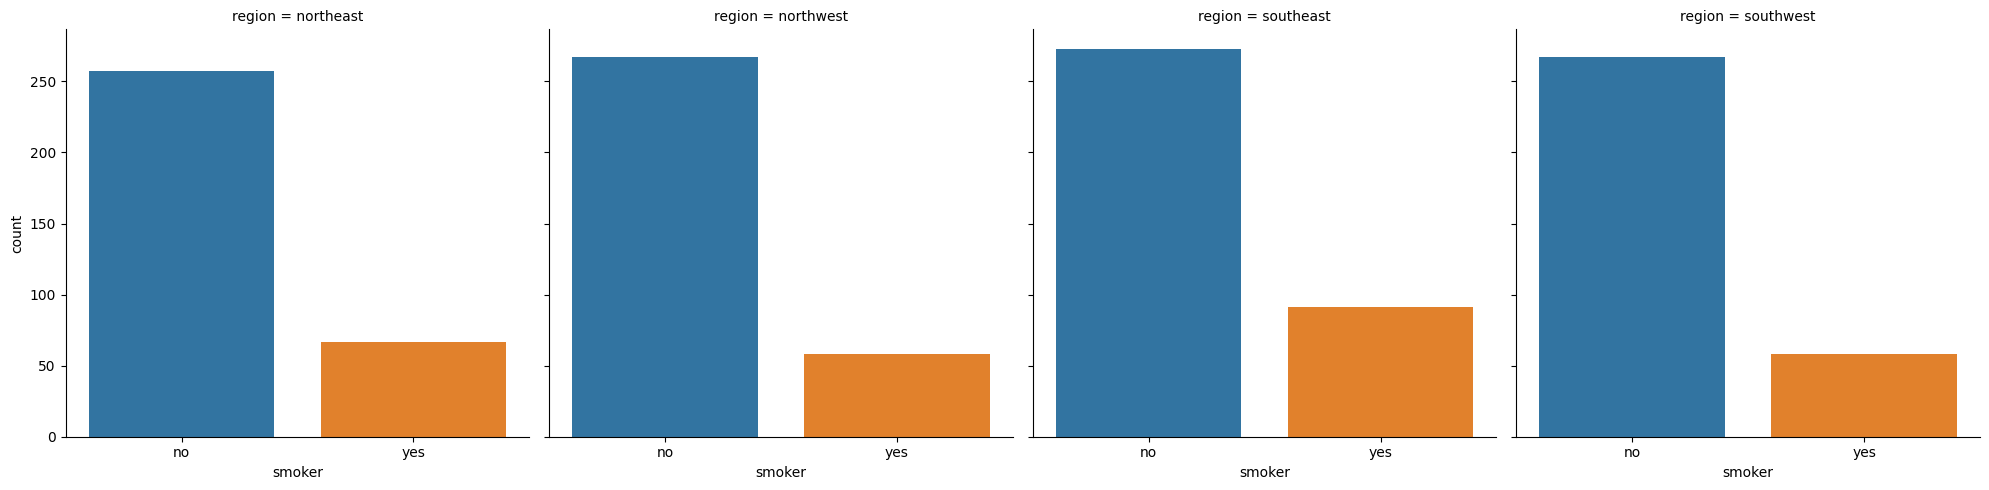

In [65]:

smokerCounts = data.groupby(['region', 'smoker']).size().reset_index(name='count')

# Plot
sns.catplot(x='smoker', y='count', hue='smoker', col='region', data=smokerCounts, kind='bar')
plt.show()

QUESTION 6

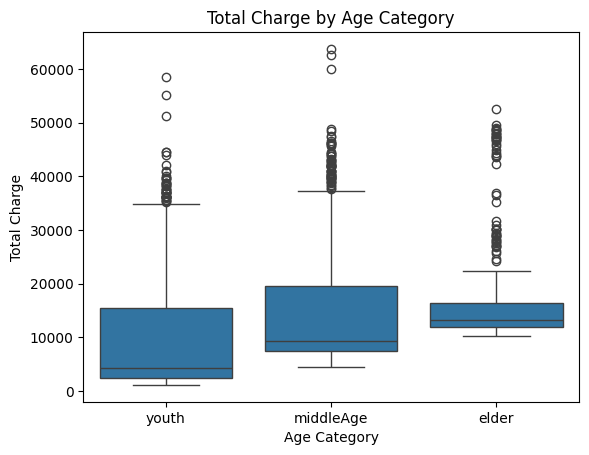

In [74]:

sns.boxplot(x='age_cat', y='charges', data=data, order=['youth', 'middleAge', 'elder'])
plt.xlabel('Age Category')
plt.ylabel('Total Charge')
plt.title('Total Charge by Age Category')
plt.show()

QUESTION 7

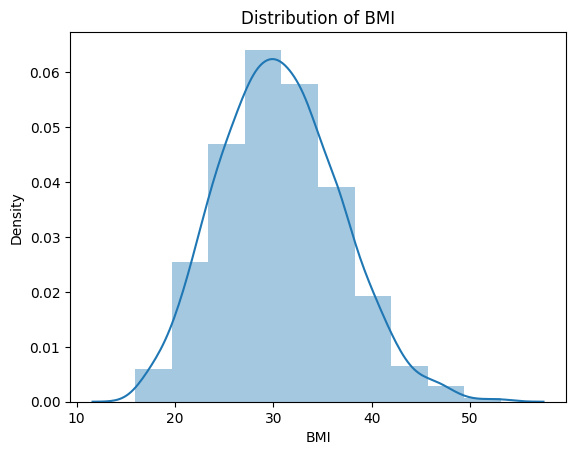

In [80]:
sns.distplot(data['bmi'], kde=True, bins=10)
plt.xlabel('BMI')
plt.ylabel('Density')
plt.title('Distribution of BMI')
plt.show()

QUESTION 8

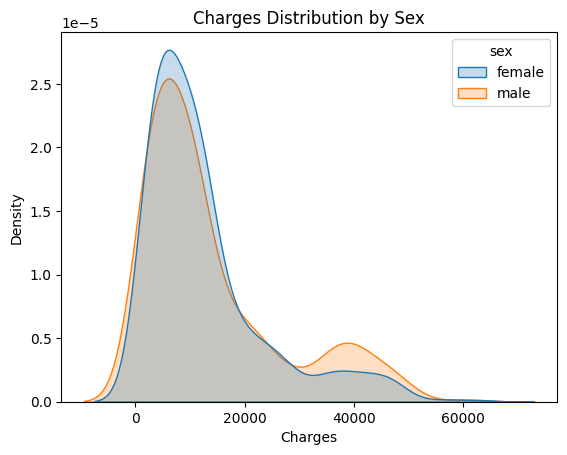

In [81]:
sns.kdeplot(data=data, x='charges', hue='sex', fill=True)

plt.title('Charges Distribution by Sex')
plt.xlabel('Charges')
plt.ylabel('Density')

plt.show()

QUESTION 9

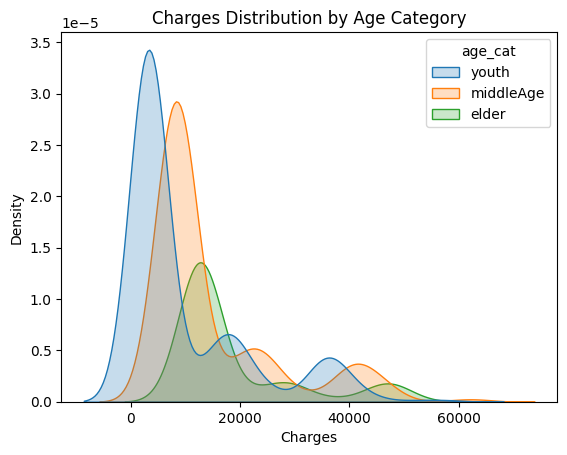

In [82]:
sns.kdeplot(data=data, x='charges', hue='age_cat', fill=True)

plt.title('Charges Distribution by Age Category')
plt.xlabel('Charges')
plt.ylabel('Density')

plt.show()